<a href="https://colab.research.google.com/github/JuanRoccia/Google-Colab/blob/main/PPA_Trabajo_Pr%C3%A1ctico_N%C2%B06_Proyecto_3_ML_Juan_Manuel_Roccia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### El siguiente Trabajo Práctico consiste en completar el notebook para resolver dos problemas de clasificación con Machine Learning Supervisado



## 1. Clasificación Múltiple con 'N' Features:  Regresión Logística con Scikit-Learn

* En este Notebook vamos a resolver un problema de ***Clasificación Múltiple con las Regresión Logística usando la librería de Scikit-Learn*** para el caso en el que tengamos en nuestro Dataset ***más de dos Features (o atributos)***.

*   DataSet: "iris.csv"

* Para resolver el problema de Clasificación vamos a utilizar la clase **"LogisticRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


* El ejemplo con el que vamos a trabajar, consiste en ***clasificar tres tipos de flores, conociendo los tamaños (alto y ancho) del petalo y sépalo*** de la flor; es decir, que tendremos 4 atributos (o Features).


* Al ser un problema ***de Clasificación múltiple obtenemos tantos modelos como clases tengamos que clasificar***, por lo que para esta caso tendremos que encontrar los parámetros $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4$ para ***tres funciones de decisión*** que sean capaces de discernir una clase con el resto:

<span style="font-size:16px">$$Flor\;1 = \beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith$$</span>

<span style="font-size:16px">$$Flor\;2 = \beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith$$</span>

<span style="font-size:16px">$$Flor\;3 = \beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith$$</span>
    
    
* Aplicando estas funciones de decisión a una logística podremos saber la probabilidad de pertenencia de cada flor a cada una de las clases de la siguiente manera:

<span style="font-size:16px">$$P(Y=Flor\;1|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith)}}$$</span>

<span style="font-size:16px">$$P(Y=Flor\;2|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith)}}$$</span>

<span style="font-size:16px">$$P(Y=Flor\;3|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith)}}$$</span>
    

* ***Daremos como predicción para una nueva flor, aquella clase que mayor probabilidad dé***.


* Para resolver este problema vamos a realizar los siguientes pasos:

    1. [Carga de datos](#M1)

    2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M2)

    3. [Visualización de los datos](#M3)

    4. [Creacción del modelo (hipótesis) y ajuste](#M4)

    5. [Obtención del modelo (hipótesis)](#M5)

    6. [Cálculo de predicción](#M6)

    7. [Graficar Matriz de confusión](#M7)


* En primer lugar vamos a importar las librería necesarias:



In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

import itertools
%matplotlib inline

In [ ]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/Drive/')

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


In [ ]:
# Path de la carpeta donde tenemos los datos
archivo = "/content/Drive/MyDrive/PPA/Data/"

### 1. Carga de datos


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo
    - ***petal_length***: El "largo" del Pétalo
    - ***petal_width***: El "ancho" del Pétalo
    


In [ ]:
# Carga de datos
df = pd.read_csv(archivo + "iris.csv")
df.tail(6)

,sepal_length,sepal_width,petal_length,petal_width,class
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### <a name="M2">2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***).
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***.
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números, siendo esta transformación:

    - ***0***: ***Iris-Setosa***
    - ***1***: ***Iris-Versicolor***
    - ***2***: ***Iris-Virginica***

In [ ]:
# Estructura de datos a numpy
x = df[['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                    # Obtengo las etiquetas

# Transformación de las etiquetas a números
le = preprocessing.LabelEncoder()                # Instancio un objeto de la clase LabelEncoder()
y  = le.fit_transform(y_labels)                  # Transformo las etiquetas a números

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### <a name="M3">3. Visualización de los datos</a>


* A continuación vamos a ver la relación que hay entre cada par de atributos de los tres tipos de flores.

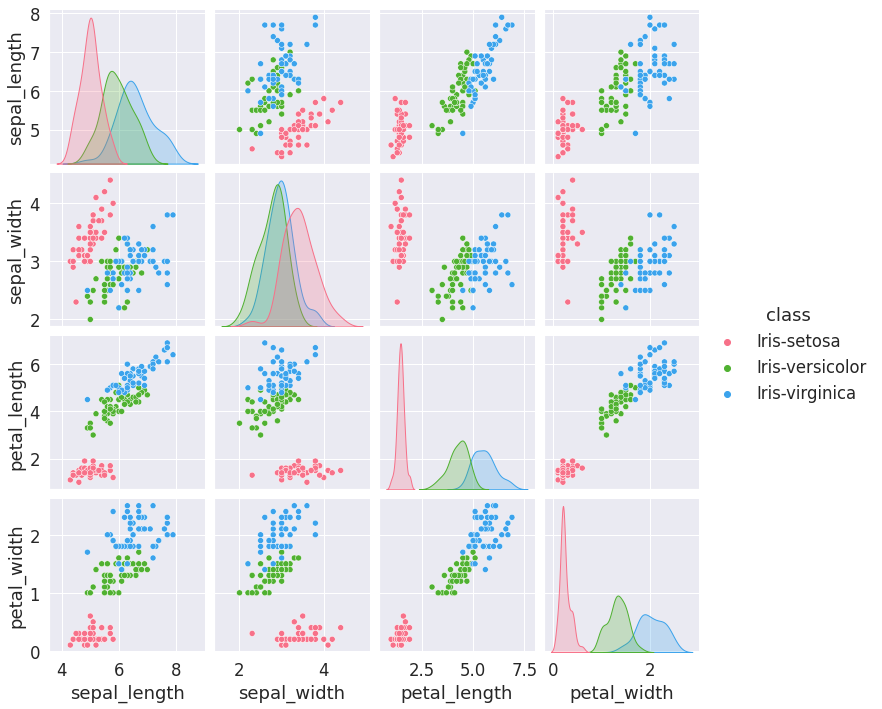

In [ ]:
# usar de seaborn la función pairplot
sns.pairplot(df, hue="class", markers="o", palette="husl")

### <a name="M4">4. Creación del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.

In [ ]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
# logReg = LogisticRegression(solver="liblinear", multi_class="ovr", max_iter=50)

logReg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr', n_jobs=None,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Entrenamos el modelo siendo la 'X' el tamaño del sepalo e 'y' el tipo de flor
logReg.fit(x_train, y_train)
# logReg.fit(x,y)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

### <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LogisticRegression*** nos proporciona los resultados de los parámetros $\beta_n$ por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos devuelve en una matriz los parámetros del $\beta_1$ al $\beta_n$ para cada una de las funciones de decisión.
<span></span><br><br>
    - ***intercept_***: Nos devuelve una lista con los parámetros ***$\beta_0$*** para cada una de las funciones de decisión.
    

* Obteniendo estos valores podemos obtener el modelo generado:

In [ ]:
# Obtención del modelo
b0 = logReg.intercept_
b1 = logReg.coef_

# Mostrarlo (print)
print("\nIris-setosa: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[0], b1=b1[0,0], b2=b1[0,1], b3=b1[0,2], b4=b1[0,3]))

print("\nIris-versicolor: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[1], b1=b1[1,0], b2=b1[1,1], b3=b1[1,2], b4=b1[1,3]))

print("\nIris-virginica: Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width + {b3:0.2f} · petal_length + {b4:0.2f} · petal_width"
      .format(b0=b0[2], b1=b1[2,0], b2=b1[2,1], b3=b1[2,2], b4=b1[2,3]))


Iris-setosa: Z = 0.26 + 0.38 · sepal_length + 1.39 · sepal_width + -2.13 · petal_length + -0.93 · petal_width

Iris-versicolor: Z = 0.94 + 0.54 · sepal_length + -1.68 · sepal_width + 0.42 · petal_length + -1.19 · petal_width

Iris-virginica: Z = -1.14 + -1.66 · sepal_length + -1.17 · sepal_width + 2.26 · petal_length + 2.37 · petal_width


### <a name="M6">6. Cálculo de Predicción</a>


* A continuación vamos a ver como predecir la clase de una Flor usando la librería de Scikit con el método ".predict(flor)" y como obtener esa misma predicción aplicando del modelo obtenido.


* Para ello seleccionemos una flor del Dataset, que para este ejemplo vamos a seleccionar la flor:
    - Class: Iris-Setosa
    - Sepal_lenght: 4.9
    - Sepal_With: 3.0
    - Petal_lenght: 1.4
    - Petal_With: 0.2


In [ ]:
# Valores de X y Y (X[n], Y[n])
x_flor = x[0]
y_flor = y[0]

print('Flor: X={} - y={} - Clase = {}'.format(x_flor, y_flor, le.inverse_transform([y_flor])))

Flor: X=[5.1 3.5 1.4 0.2] - y=0 - Clase = ['Iris-setosa']


* A continuación vamos a ver cual es la predicción que nos devuelve Scikit-Learn.


* Veamos también cuales son los parámetros de la función de decisión y cual es el resultado de esa función de decisión para cada clase:

In [ ]:
# Predicción y función de decisión
pred = logReg.predict([x_flor])
prob = logReg.decision_function([x_flor])

print('Predicción -> Pertenece a la clase {}'.format(pred))
print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(pred)))
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(prob[0,0], prob[0,1], prob[0,2]))

Predicción -> Pertenece a la clase [0]
Predicción Etiquetada -> Pertenece a la clase ['Iris-setosa']
Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 3.92
	Iris-Versicolor: -1.85
	Iris-Virginica: -10.09


* A continuación vamos a calcular la función de decisión de esa flor para cada clase usando el modelo y posteriormente la probabilidad de pertenencia a cada clase:

In [ ]:
# Obtenemos los parámetros
b0 = logReg.intercept_
b1 = logReg.coef_

# Función de decisión
z_setosa = b0[0] + (b1[0,0] * x_flor[0]) + (b1[0,1] * x_flor[1]) + (b1[0,2] * x_flor[2]) + (b1[0,3] * x_flor[3])
z_versicolor = b0[1] + (b1[1,0] * x_flor[0]) + (b1[1,1] * x_flor[1]) + (b1[1,2] * x_flor[2]) + (b1[1,3] * x_flor[3])
z_virginica = b0[2] + (b1[2,0] * x_flor[0]) + (b1[2,1] * x_flor[1]) + (b1[2,2] * x_flor[2]) + (b1[2,3] * x_flor[3])


# Imprimimos las funciones de decisión
print('Resultado de funcion de decision de cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}\n' \
     .format(z_setosa, z_versicolor, z_virginica))

# Calculamos las probabilidades
prob_setosa = 1 / (1 + math.exp(-1 * (z_setosa)))
prob_versicolor = 1 / (1 + math.exp(-1 * (z_versicolor)))
prob_virginica = 1 / (1 + math.exp(-1 * (z_virginica)))

# Imprimimos las probabilidades
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(prob_setosa, prob_versicolor, prob_virginica))

Resultado de funcion de decision de cada clase: 
	Iris-Setosa: 3.92
	Iris-Versicolor: -1.85
	Iris-Virginica: -10.09

Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 0.98
	Iris-Versicolor: 0.14
	Iris-Virginica: 0.00


* Veamos como realizamos esos cálculos con detalle:

In [ ]:
# Imprimimos por pantalla la información de cada cálculo
print('\nIris-Setosa ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[0], b1[0,0], x_flor[0], b1[0,1], x_flor[1], b1[0,2], x_flor[2], b1[0,3], x_flor[3], z_setosa))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_setosa, 1 / (1 + math.exp(-1 * z_setosa))))

print('\nIris-Versicolor ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[1], b1[1,0], x_flor[0], b1[1,1], x_flor[1], b1[1,2], x_flor[2], b1[1,3], x_flor[3], z_versicolor))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_versicolor, 1 / (1 + math.exp(-1 * z_versicolor))))

print('\nIris-Virginica ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[2], b1[2,0], x_flor[0], b1[2,1], x_flor[0], b1[2,2], x_flor[1], b1[2,3], x_flor[3], z_virginica))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_virginica, 1 / (1 + math.exp(-1 * z_virginica))))


Iris-Setosa 
  Z =  0.26 + 0.38·5.10 + 1.39·3.50 + -2.13·1.40 + -0.93·0.20 = 3.92
  g(Z) =  1 / 1 + e^-(3.92) = 0.98

Iris-Versicolor 
  Z =  0.94 + 0.54·5.10 + -1.68·3.50 + 0.42·1.40 + -1.19·0.20 = -1.85
  g(Z) =  1 / 1 + e^-(-1.85) = 0.14

Iris-Virginica 
  Z =  -1.14 + -1.66·5.10 + -1.17·5.10 + 2.26·3.50 + 2.37·0.20 = -10.09
  g(Z) =  1 / 1 + e^-(-10.09) = 0.00


### <a name="M7">7. Matriz de confusión</a>


* Finalmente, calculamos y graficamos la matriz de confusión

In [ ]:
# Métricas con y_test y y_predict
y_predict = logReg.predict(x_test)
# y_real =    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2]
# y_predict = [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 2, 1, 1, 0, 2]

# classification_report
print(classification_report(y_true=y_test, y_pred=y_predict))
# print(classification_report(y_true=y_real, y_pred=y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.73      0.84        11
           2       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.90        30
weighted avg       0.93      0.90      0.90        30



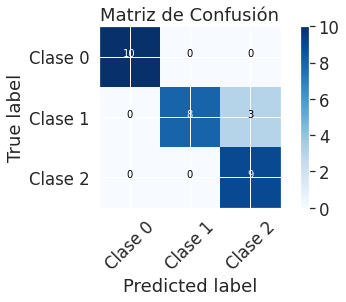

In [ ]:
# Matriz de confusión
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[0, 1, 2])
plot_confusion_matrix(matriz_confusion, classes=['Clase 0', 'Clase 1', 'Clase 2'], title='Matriz de Confusión')
plt.show()

## 2. Clasificación de pacientes con enfermedades coronarias

* El objetivo de este ejercicio es el de obtener un modelo capaz de predecir si un paciente tiene o no una enfermedad coronaria.

*   **DataSet**: "heart_disease.csv"

* Sobre el Dataset se tienen las siguientes características:

    - age: Edad en años
    - sex: (1 = hombre; 0 = mujer)
    - cp: Tipo de dolor en el pecho
    - trestbps: Presión arterial
    - chol: Colesterol
    - fbs: (azúcar en sangre en ayunas> 120 mg / dl) (1 = verdadero; 0 = falso)
    - restecg: Resultados electrocardiográficos en reposo
    - thalach: Frecuencia cardíaca máxima alcanzada
    - exang: Angina inducida por ejercicio (1 = sí; 0 = no)
    - oldpeak: Depresión del ST inducida por el ejercicio relativo al descanso
    - slope: Pendiente del segmento pico del ejercicio ST
    - ca: Número de vasos principales (0-3) coloreados por flourosopía
    - thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
    - target: 1 = Enfermo, 0 = Sano


* En este ejercicio se le pide que genere un modelo que sea capaz de **clasificar** a un paciente indicando si sufre o no una enfermendad coronaria.

* Para ello hay que tomar las variables de entrada que se consideren y como variable de salida el target.

* Para resolver este problema vamos a realizar los siguientes pasos:

    1. [Carga de datos](#M8) 
    2. [***Visualización de los datos***, de esta manera podremos seleccionar las variables que consideremos más relevantes visualmente.](#M9)
    3. [***Cambio de estructura de datos a numpy y transformación de las etiquetas***.](#M10)
    4. [***Creación del modelo (hipótesis) y ajuste***.](#M11)
    5. [***Obtención del modelo (hipótesis)***.](#M12)
    6. [***Acierto del Modelo***. Obtener el porcentaje de acierto del modelo.](#M13)
    7. [Matriz de confusión](#M14)

### <a name="M8">1. Carga de datos</a>

* El primer paso a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "heart_disease.csv" *


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), con sus correspondientes columnas.

In [ ]:
# Carga de datos
df = pd.read_csv(archivo + "heart_disease.csv")
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


### <a name="M9">2. Visualización de los datos</a>

*  De esta manera podremos seleccionar las variables que consideremos más relevantes visualmente.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# recuento de enfermedades del corazón
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

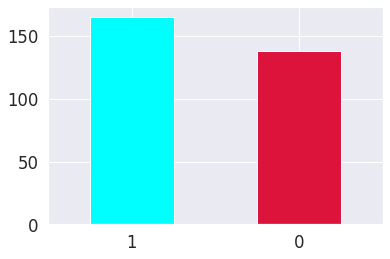

In [ ]:
df['target'].value_counts().plot(kind='bar', color = ['cyan', 'crimson'], grid = True);
plt.xticks(rotation = 0)

In [ ]:
# valores no null
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

***Notas:***
> * Tenemos 165 personas con enfermedades cardíacas y 138 personas sin enfermedades cardíacas, por lo que el problema está equilibrado.
* No hay valores perdidos en el dataset

In [ ]:
# 1 = hombre 0 = mujer
print(df.sex.value_counts(),'\n')
# Comparo la columna target con la columna sex.
# 1 = efermo 0 = no
pd.crosstab(df.target,df.sex)

1    207
0     96
Name: sex, dtype: int64 



sex,0,1
target,,
0,24,114
1,72,93


***Notas:***
* De 96 mujeres 72 pertenecen al target 1, basado en esta variable si es mujer, hay un 70% aproximadamente de probabilidad de que tenga una enfermedad cardíaca. 
* De 207 hombres 93 (casi la mitad) pertenecen al target 1. Entonces podriamos predecir que si es hombre, el 50% de las veces tendra una enfermedad cardíaca.
* Promediando estos dos valores, podemos suponer, sin basarnos en otros parámetros, que si hay una persona, existe un 60% de probabilidad de que tenga una enfermedad cardíaca.

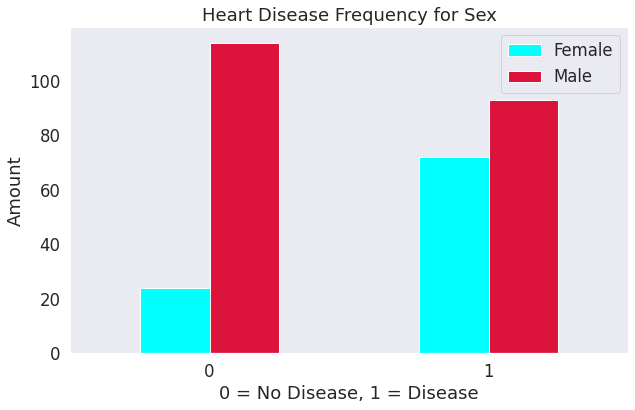

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['cyan','crimson']);

plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.grid()
plt.xticks(rotation = 0);

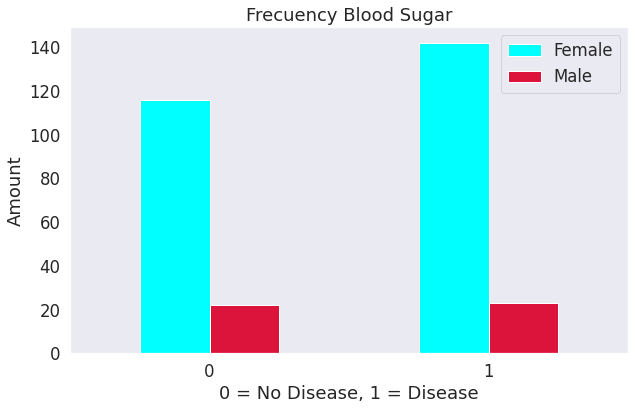

In [ ]:
pd.crosstab(df.target,df.fbs).plot(kind='bar',
                                  figsize=(10,6),
                                  color=['cyan','crimson']);

plt.title('Frecuency Blood Sugar')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female','Male'])
plt.grid()
plt.xticks(rotation = 0);

In [ ]:
# Valores categoricos y continuos
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
continous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

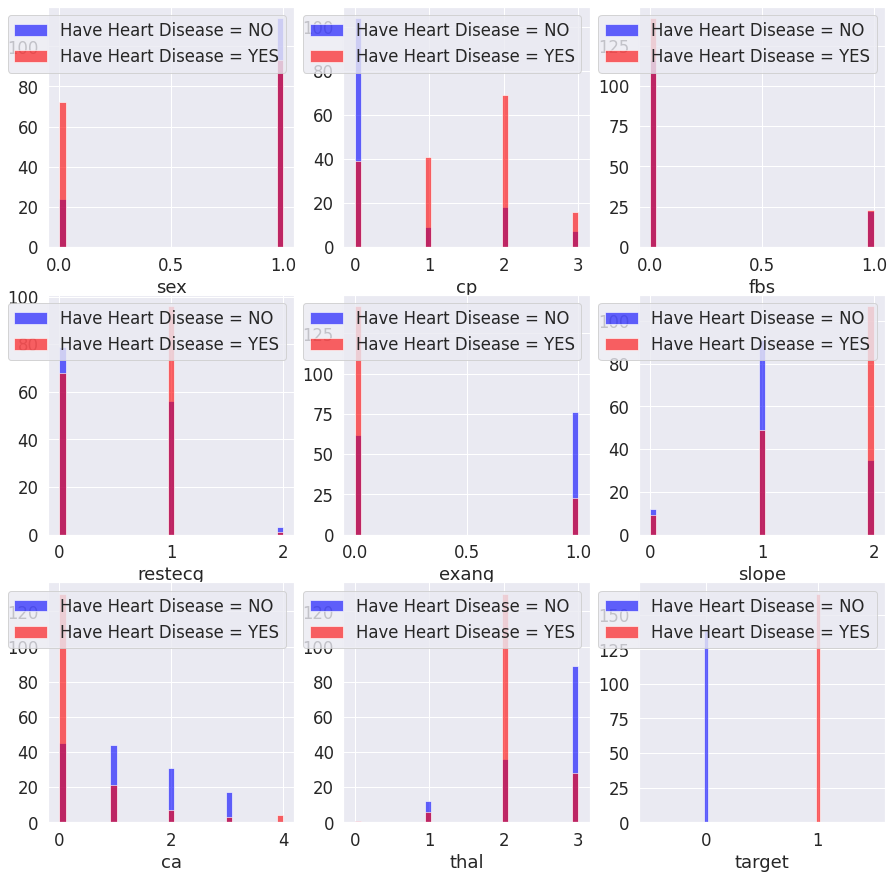

In [ ]:
# Visualización y análisis de los valores categóricos
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* cp: las personas con cp igual a 1, 2, 3 tienen más probabilidades de tener enfermedades del corazón que las personas con cp igual a 0.
* restecg: las personas con valor 1 tienen más probabilidades de tener una enfermedad cardíaca.
* exang: las personas con valor 0 tienen más enfermedades cardíacas que las personas con valor 1.
* slope: las personas con un valor de pendiente igual a 2 tienen más probabilidades de tener una enfermedad cardíaca que las personas con un valor de pendiente igual a 0 o 1.
* ca: las personas con ca igual a 0 tienen más probabilidades de tener enfermedades del corazón.
* thal: las personas con un valor de thal igual a 2 tienen más probabilidades de tener enfermedades del corazón.

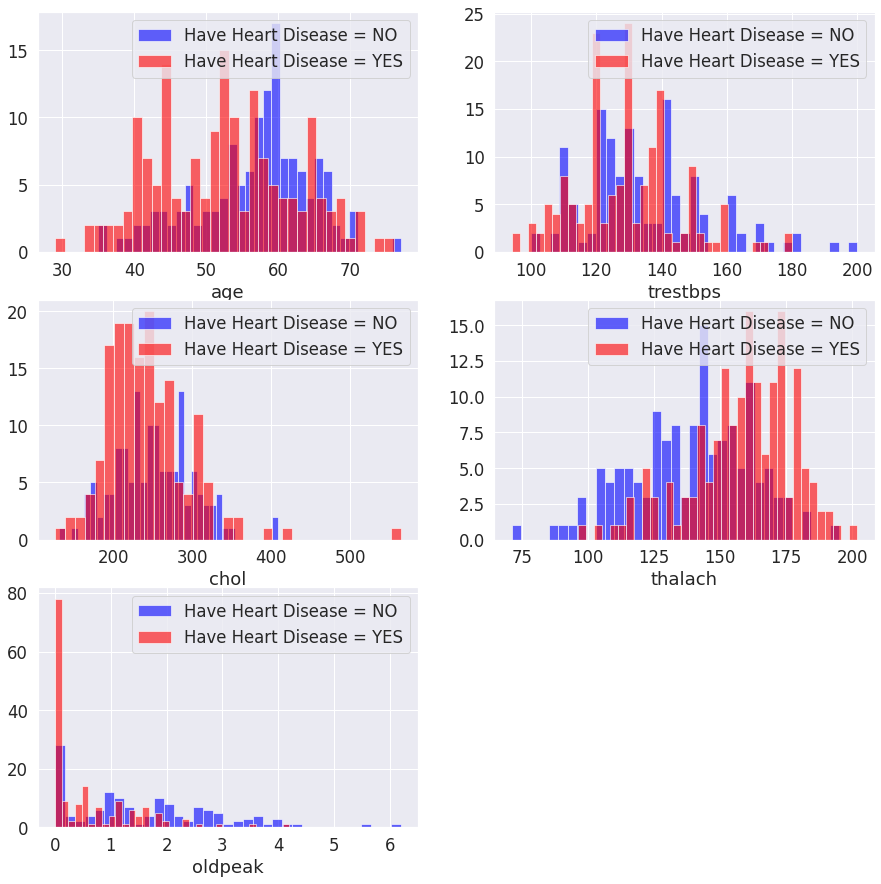

In [ ]:
# Visualización y análisis de los valores continuos
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* trestbps: cualquier valor por encima de 130-140 suele ser motivo de preocupación.
* chol: por encima de 200 es motivo de preocupación.
* thalach: Las personas que alcanzaron un máximo de más de 140 tienen más probabilidades de tener enfermedades del corazón.
* oldpeak: La depresión de ST máxima inducida por el ejercicio en relación con el descanso observa el estrés del corazón durante el ejercicio. El corazón no saludable se estresará más.

#### Otros Gráficos

Text(0.5, 1.0, 'Age Histogram')

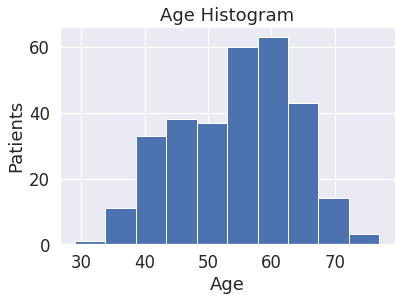

In [ ]:
# 1--- AGE OF PATIENTE PLOT
plt.figure()
counts, bins = np.histogram(df['age'])
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Age')
plt.ylabel('Patients')
plt.grid(True)
plt.title('Age Histogram')

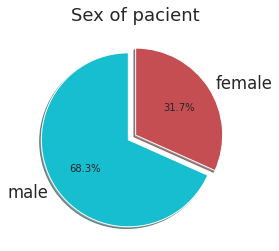

In [ ]:
# 2--- SEX OF PATIENTE PLOT
plt.figure()
list_sex = df['sex']
length = len(list_sex)
male = np.count_nonzero(list_sex == 1)
pie_sex = [male, length-male]
labels = ['male', 'female']
colors = ['tab:cyan','r']
explode = (0.1, 0)
plt.pie(pie_sex,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('Sex of pacient');

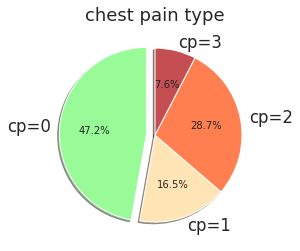

In [ ]:
# 3--- CHEST PAIN TYPE PLOT
plt.figure()
list_cp = df['cp']
length = len(list_cp)
cp0 = np.count_nonzero(list_cp == 0)
cp1 = np.count_nonzero(list_cp == 1)
cp2 = np.count_nonzero(list_cp == 2)
cp3 = np.count_nonzero(list_cp == 3)
pie_cp = [cp0,cp1,cp2,cp3]
labels = ['cp=0', 'cp=1', 'cp=2', 'cp=3']
colors = ['palegreen','moccasin','coral','r']
explode = (0.1, 0,0,0)
plt.pie(pie_cp,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('chest pain type');

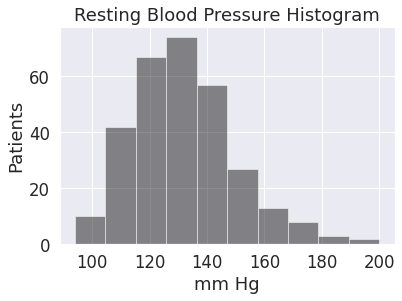

In [ ]:
# 4--- RESTING BLOOD PRESSURE PLOT
plt.figure()
counts, bins = np.histogram(df['trestbps'])
plt.hist(bins[:-1], bins, weights=counts,color='k', alpha=0.5)
plt.xlabel('mm Hg')
plt.ylabel('Patients')
plt.title('Histogram of trestbps')
plt.grid(True)
plt.title('Resting Blood Pressure Histogram');

Text(0.5, 1.0, 'Serum Cholestoral Histogram')

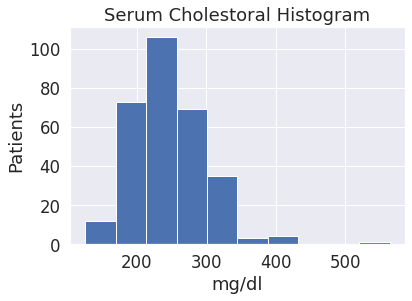

In [ ]:
# 5--- SERUM CHOLESTORAL PLOT
plt.figure()
counts, bins = np.histogram(df['chol'])
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('mg/dl')
plt.ylabel('Patients')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.title('Serum Cholestoral Histogram')

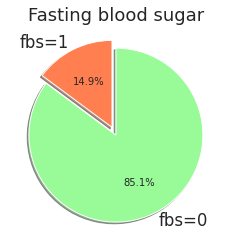

In [ ]:
# 6--- FASTING BLOOD SUGAR PLOT
plt.figure()
list_fbs = df['fbs']
length = len(list_fbs)
fbs = np.count_nonzero(list_fbs == 1)
pie_fbs = [fbs, length-fbs]
labels = ['fbs=1', 'fbs=0']
colors = ['coral','palegreen']
explode = (0.1, 0)
plt.pie(pie_fbs,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('Fasting blood sugar');

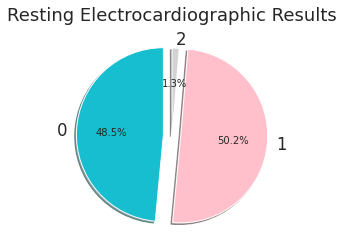

In [ ]:
# 7--- RESTING ELECTROCARDIOGRAPHIC PLOT
plt.figure()
list_restecg = df['restecg']
re0 = np.count_nonzero(list_restecg == 0)
re1 = np.count_nonzero(list_restecg == 1)
re2 = np.count_nonzero(list_restecg == 2)
pie_rest = [re0,re1,re2]
labels = ['0','1','2']
colors = ['tab:cyan','pink','lightgrey']
explode = (0.1, 0.1,0)
plt.pie(pie_rest,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('Resting Electrocardiographic Results');

Text(0.5, 1.0, 'Maximum Heart Rate Achived Histogram')

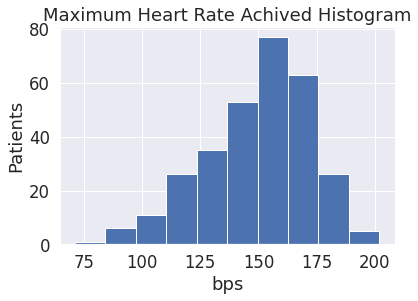

In [ ]:
# 8--- MAXIMUM HEART RATE ACHIEVED PLOT
plt.figure()
counts, bins = np.histogram(df['thalach'])
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('bps')
plt.ylabel('Patients')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.title('Maximum Heart Rate Achived Histogram')

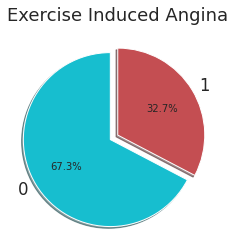

In [ ]:
# 9--- EXERCISE INDUCED ANGINA PLOT  exang => exercise induced angina
plt.figure()
list_ex = df['exang']
length = len(list_ex)
ex = np.count_nonzero(list_ex == 1)
pie_ex = [length-ex,ex]
labels = ['0', '1']
colors = ['tab:cyan','r']
explode = (0.1, 0)
plt.pie(pie_ex,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('Exercise Induced Angina');

Text(0.5, 1.0, 'ST depression induced by exercise relative to rest Histogram')

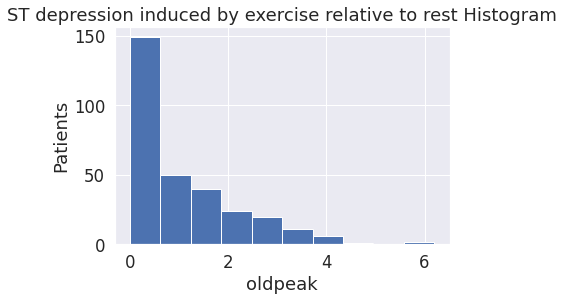

In [ ]:
# 10-- ST DEPRESSION INDUCED BY EXERCISE RELATIVE TO REST ST PLOT
plt.figure()
counts, bins = np.histogram(df['oldpeak'])
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('oldpeak')
plt.ylabel('Patients')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.title('ST depression induced by exercise relative to rest Histogram')

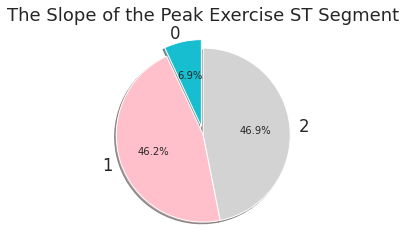

In [ ]:
# 11-- THE SLOPE OF THE PEAK EXERCISE ST SEGMENT PLOT   slope => the slope of the peak exercise ST segment
plt.figure()
list_slope = df['slope']
sl0 = np.count_nonzero(list_slope == 0)
sl1 = np.count_nonzero(list_slope == 1)
sl2 = np.count_nonzero(list_slope == 2)
pie_slope = [sl0,sl1,sl2]
labels = ['0','1','2']
colors = ['tab:cyan','pink','lightgrey']
explode = (0.1, 0,0)
plt.pie(pie_slope,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('The Slope of the Peak Exercise ST Segment');

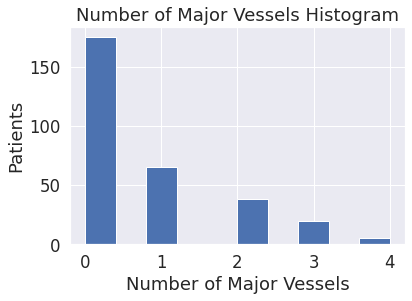

In [ ]:
# 12-- NUMBER OF MAJOR VESSELS PLOT  ca => number of major vessels (0-3) colored by flourosopy
plt.figure()
counts, bins = np.histogram(df['ca'])
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Number of Major Vessels')
plt.ylabel('Patients')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.title('Number of Major Vessels Histogram');

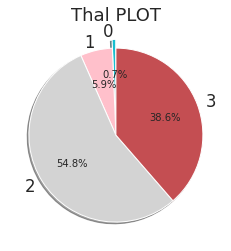

In [ ]:
# 13-- THAL PLOT
plt.figure()
list_thal = df['thal']
thal0 = np.count_nonzero(list_thal == 0)
thal1 = np.count_nonzero(list_thal == 1)
thal2 = np.count_nonzero(list_thal == 2)
thal3 = np.count_nonzero(list_thal == 3)
pie_thal = [thal0,thal1,thal2,thal3]
labels = ['0','1','2','3']
colors = ['tab:cyan','pink','lightgrey','r']
explode = (0.1, 0,0,0)
plt.pie(pie_thal,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True, startangle=90);
plt.title('Thal PLOT');

### <a name="M10">3. Cambio de estructura de datos a numpy y transformación de las etiquetas</a>

* Vamos a pasar los datos de los pacientes a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas age	sex	cp	trestbps	chol	fbs	restecg	thalach	exang	oldpeak	slope	ca	thal*** representan las variables de entrada y las vamos a pasar a un ***numpy array***.
<span></span><br><br>
    - La ***columna target*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Dividimos los datos en X e y
X = df.drop('target',axis = 1)
y = df.target.values

In [ ]:
# Utilizamos una semilla aleatoria para 
# garantizar que los resultados sean reproducibles
np.random.seed(42)
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [ ]:
y_train, len(y_train)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242)

In [ ]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [ ]:
y_test, len(y_test)

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0]), 61)

### <a name="M11">4. Creación del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.

In [ ]:
# Creamos un objeto de la clase LogisticRegression
model = LogisticRegression(solver="liblinear", multi_class="ovr", max_iter=50)

# Entrenamos el modelo
model.fit(X_train, y_train)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

### <a name="M12">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LogisticRegression*** nos proporciona los resultados de los parámetros $\beta_n$ por medio de los atributos del target:
<span></span><br><br>
    - ***Obteniendo*** estos valores podemos obtener el modelo generado:
<span></span><br><br>
    

In [ ]:
# Obtener los parámetros de la funcion de decisión
# age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal

b0 = model.intercept_[0]
b1 = model.coef_[0,0]
b2 = model.coef_[0,1]
b3 = model.coef_[0,2]
b4 = model.coef_[0,3]
b5 = model.coef_[0,4]
b6 = model.coef_[0,5]
b7 = model.coef_[0,6]
b8 = model.coef_[0,7]
b9 = model.coef_[0,8]
b10 = model.coef_[0,9]
b11 = model.coef_[0,10]
b12 = model.coef_[0,11]
b13 = model.coef_[0,12]

print("""  Z = {b0:0.2f} + {b1:0.2f} · age + {b2:0.2f} · sex + {b3:0.2f} · cp + {b4:0.2f} ·
  trestbps + {b5:0.2f} · chol + {b6:0.2f} · fbs + {b7:0.2f} · restecg + {b8:0.2f} ·
   thalach + {b9:0.2f} · exang + {b10:0.2f} · oldpeak + {b11:0.2f} · slope + {b12:0.2f} · 
        ca + {b13:0.2f} · thal  """.format(b0=b0, b1=b1, b2=b2, b3=b3, b4=b4, b5=b5, b6=b6, 
                                   b7=b7, b8=b8, b9=b9, b10=b10, b11=b11, b12=b12, b13=b13))

  Z = 0.37 + 0.01 · age + -1.35 · sex + 0.79 · cp + -0.01 ·
  trestbps + -0.00 · chol + 0.13 · fbs + 0.52 · restecg + 0.03 ·
   thalach + -0.89 · exang + -0.61 · oldpeak + 0.66 · slope + -0.77 · 
        ca + -0.86 · thal  


### <a name="M13">6. Acierto del Modelo. Obtener el porcentaje de acierto del modelo.</a>


In [ ]:
# Hacemos un diccionario para guardar el puntaje del modelo
model_scores = {}

# Evaluamos el modelo y apendizamos el puntaje a model_scores
model_scores = model.score(X_test, y_test)

# Mostramos el score
model_scores

0.8688524590163934

### <a name="M7">7. Matriz de confusión</a>
* Finalmente, calculamos y graficamos la matriz de confusión

In [ ]:
# Make preidctions on test data
y_preds = model.predict(X_test)

y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
# Matriz de confusión
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 4 28]]


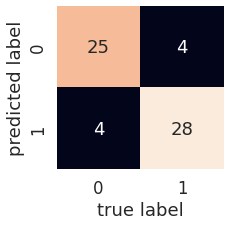

In [ ]:
# Matriz de confusión con Seaborn
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,  
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [ ]:
# Informe de clasificación
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Enlaces (documentacion y contenido consultado)
* https://repositorio.unal.edu.co/bitstream/handle/unal/79641/1152700918.2020.pdf?sequence=5&isAllowed=y

* http://repositorio.uan.edu.co/bitstream/123456789/4803/5/2021DavidAlejandroGallegoMonografi%CC%81a.pdf

* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

* https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

* https://scikit-learn.org/stable/modules/preprocessing.html

* https://www.analyticsvidhya.com/blog/2021/12/what-does-numpy-random-seed-do/

* https://bokeh.org/

* https://www.kaggle.com/code/faressayah/predicting-heart-disease-using-machine-learning

* https://colab.research.google.com/github/sujikathir/Heart-disease-Identification/blob/master/HEART_DISEASE.ipynb#scrollTo=KC3dwoE0w_oC

* https://github.com/RicardoMoya/Data_Science_Introduction_With_Python/blob/master/31_Ejercicio6_Clasificacion_Enfermedad_Coronaria.ipynb

* https://www.kaggle.com/code/dovah0/notebookc4f0fa41a8

* https://github.com/RicardoMoya/Data_Science_Introduction_With_Python/blob/master/30_Clasificacion_Multiple_N_Features_Regresion_Logistica_Scikit_Iris.ipynb

* <a href="https://www.google.com/search?q=matriz+de+correlacion&sxsrf=ALiCzsaL5oBM5h6Xm-E82THTLncjE-Ju6g%3A1669068519045&ei=5_Z7Y5-pAtnV1sQP7p6C4Ac&oq=matriz+de+correl&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAxgAMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyCAgAEIAEEMsBMgUIABCABDoKCAAQRxDWBBCwAzoHCAAQsAMQQzoECCMQJzoECAAQQ0oECEEYAEoECEYYAFCUBFiGCmCNFWgBcAF4AIABXogBhgSSAQE2mAEAoAEByAEKwAEB&sclient=gws-wiz-serp">Matriz de correlacion</a>

* <a href="https://www.google.com/search?q=matriz+de+confusion&sxsrf=ALiCzsaci0yG5qNoe6NsilkETpsBfXAEeQ%3A1669068435967&ei=k_Z7Y7DKOrrS1sQPzIia0Ao&ved=0ahUKEwjw3-y5pMD7AhU6qZUCHUyEBqoQ4dUDCBA&uact=5&oq=matriz+de+confusion&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIECCMQJzIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoKCAAQRxDWBBCwAzoECAAQQzoKCAAQsQMQgwEQQzoHCAAQsQMQQzoKCAAQgAQQhwIQFDoICAAQgAQQywFKBAhBGABKBAhGGABQ9A5YmB5goCJoAXABeACAAaYBiAHzCJIBBDEwLjKYAQCgAQHIAQjAAQE&sclient=gws-wiz-serp">Matriz de confusión</a>

* <a href="https://www.google.com/search?q=matriz+de+nash&sxsrf=ALiCzsYjtQ3kPeXzWe4ry3AeYSEvtSa6_A%3A1669068408689&ei=ePZ7Y-XeKdbb1sQP952EkAY&ved=0ahUKEwjl-uuspMD7AhXWrZUCHfcOAWIQ4dUDCBA&uact=5&oq=matriz+de+nash&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCAAQgAQ6CggAEEcQ1gQQsAM6BwgAELADEEM6CggAEIAEEIcCEBQ6BggAEBYQHjoICAAQFhAeEApKBAhBGABKBAhGGABQ1QZY9Qlgxw5oAXABeACAAaQBiAGrBJIBAzEuM5gBAKABAcgBCsABAQ&sclient=gws-wiz-serp">matriz de nash</a>

* https://pesquisa.bvsalud.org/portal/resource/pt/biblio-1289245

* http://rstudio-pubs-static.s3.amazonaws.com/514121_43c005ab7bb049bbaee19aaf9dec29cd.html

* https://gist.github.com/shushrutsharma/f51a8f9ce0692c040d379d0b2382118f

* https://github.com/vedantyetekar7/heart-disease-prediction/blob/main/heart-disease-prediction.ipynb